In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
def load_data_preprocessed_prices():
    df_prices = pd.read_csv('./Preprocessed_Prices.csv')
    df_prices['Date'] = pd.to_datetime(df_prices['Date'], format='%d/%m/%Y')
    df_prices['Date'] = df_prices['Date'].dt.strftime('%Y-%m')
    df_prices=df_prices.drop(['District', 'Market','day_1','day_2','day_3','day_4','day_5','day_6','day_7','day_8','day_9','day_10','day_11','day_12','day_13','day_14','day_15','ID','Min_Price','Max_Price','Category'], axis = 1)
    df_prices=df_prices.groupby(['State','Variety','Date'], as_index=False).mean()
    
    return df_prices

In [6]:
df_prices=load_data_preprocessed_prices()

In [7]:
df_prices.head()

,State,Variety,Date,Modal_Price,Forecast_Num
0,Gujarat,Cotton,2009-01,2750.000000,0
1,Gujarat,Cotton,2009-02,2684.722222,0
2,Gujarat,Cotton,2009-03,2668.750000,0
3,Gujarat,Cotton,2009-04,3012.500000,0
4,Gujarat,Cotton,2009-05,3090.500000,0


In [8]:
def impute_vals(data):
    new_data = pd.DataFrame()
    data = data.drop('num_nans', axis = 1)
    months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    for month_idx, month in enumerate(months):
        null_idx = pd.isnull(data[month])
        monthly_data = data.loc[null_idx[null_idx == True].index]
        if(month == 'JAN'):
            monthly_data['JAN'] = monthly_data['FEB']
        elif(month == 'DEC'):
            monthly_data['DEC'] = monthly_data['NOV']
        else:
            monthly_data[month] = (monthly_data[months[month_idx - 1]] + monthly_data[months[month_idx + 1]]) * 0.5
        new_data = pd.concat([new_data, monthly_data], axis = 0)
    return new_data

def load_data_rainfall():
    data = pd.read_csv('./Climate/Rainfall/Monthly_Statewise_1901_2017.csv')
    data['YEAR'] = data['YEAR'].astype(np.int16)
    data = data.drop(['ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'], axis = 1)
    
    null_idx = pd.isnull(data).sum(axis = 1)
    null_idx = null_idx[null_idx > 0]
    null_data = data.loc[null_idx.index]
    data = data.drop(null_idx.index, axis = 0)

    null_data = null_data.assign(num_nans = null_idx)
    null_data = null_data[null_data['num_nans'] <= 1]
    null_data = impute_vals(null_data).sort_index()
    data = pd.concat([data, null_data], axis = 0).sort_index()
    
    data=data.rename(columns={"SUBDIVISION":"State","JAN": 1,"FEB": 2,"MAR": 3,"APR": 4,"MAY": 5,"JUN": 6,"JUL": 7,"AUG": 8,"SEP": 9,"OCT": 10,"NOV": 11,"DEC": 12,})
    data=data.melt(id_vars=["State", "YEAR"], 
        var_name="Date", 
        value_name="Value")
    data['Date'] = data.YEAR.astype(str)+"-"+data.Date.astype(str)
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
    data['Date'] = data['Date'].dt.strftime('%Y-%m')
    data=data.drop(['YEAR'],axis=1)
    data["State"].replace({"Gujarat Region": "Gujarat","Haryana Delhi & Chandigarh":"Haryana","Madhya Maharashtra":"Maharashtra","Coastal Karnataka":"Karnataka","South Interior Karnataka":"Karnataka","North Interior Karnataka":"Karnataka","West Madhya Pradesh":"Madhya Pradesh","East Madhya Pradesh":"Madhya Pradesh","East Rajasthan":"Rajasthan","West Rajasthan":"Rajasthan"}, inplace=True)
    data=data.groupby(['State','Date'], as_index=False).sum()
    return data


In [9]:
df_Rainfall = load_data_rainfall()
df_Rainfall.shape
df_Rainfall.head()

,State,Date,Value
0,Andaman & Nicobar Islands,1901-01,49.2
1,Andaman & Nicobar Islands,1901-02,87.1
2,Andaman & Nicobar Islands,1901-03,29.2
3,Andaman & Nicobar Islands,1901-04,2.3
4,Andaman & Nicobar Islands,1901-05,528.8


Gujarat Cotton
Modal Price correlation 0.1419716569201538
Pct Change correlation 0.12550566612192432


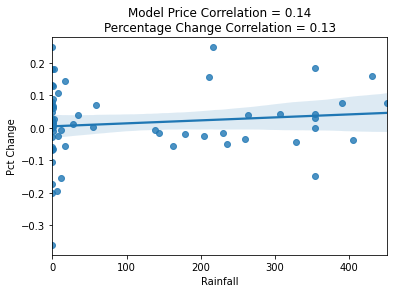

Gujarat H.B
Modal Price correlation -0.02227629924478115
Pct Change correlation 0.2060365024011687


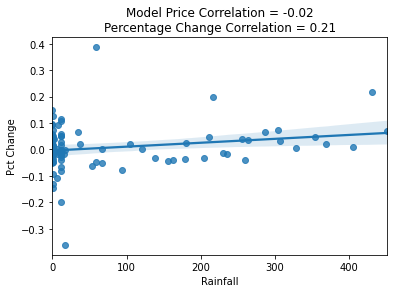

Gujarat Other
Modal Price correlation -0.0836086733214349
Pct Change correlation 0.09672138446736568


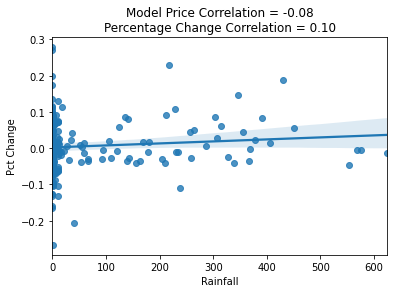

Gujarat Shanker
Modal Price correlation -0.1062906999237503
Pct Change correlation 0.07168397616151537


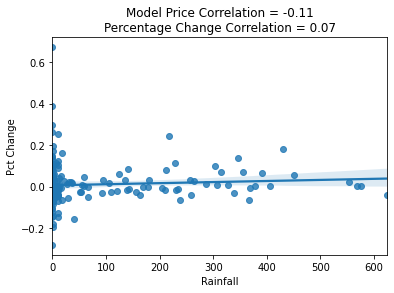

Haryana American
Modal Price correlation -0.11767732744170274
Pct Change correlation 0.10549495988252852


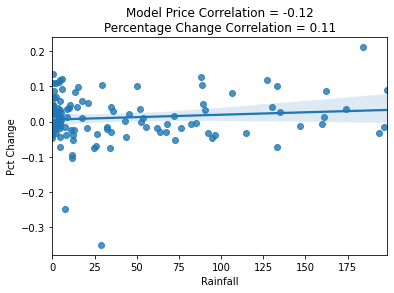

Karnataka F
Modal Price correlation -0.1504474881422004
Pct Change correlation -0.12223238946319258


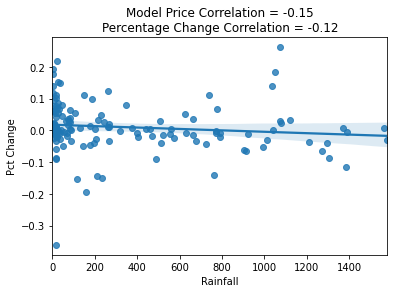

Karnataka GCH
Modal Price correlation -0.1482035370635104
Pct Change correlation 0.002851367300466727


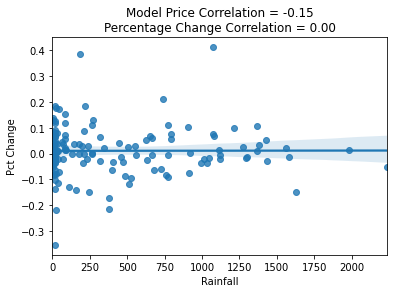

Karnataka LH
Modal Price correlation -0.20413639024340013
Pct Change correlation -0.13379041969898167


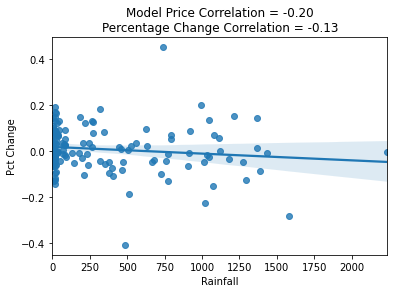

Karnataka MCU
Modal Price correlation -0.08981784327064711
Pct Change correlation -0.007300785453760892


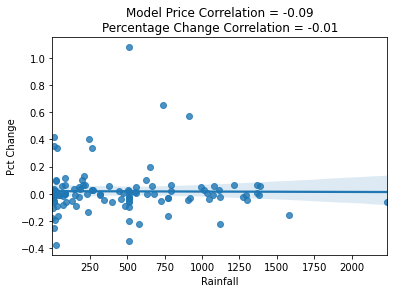

Madhya Pradesh DCH
Modal Price correlation 0.17437859549034748
Pct Change correlation 0.3899891308049623


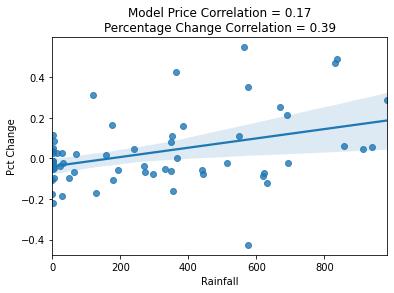

Madhya Pradesh H
Modal Price correlation -0.025432601622686825
Pct Change correlation 0.005479382111177263


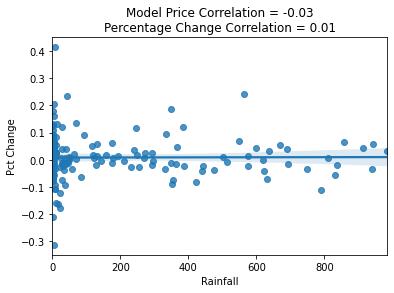

Madhya Pradesh Other
Modal Price correlation -0.07635717487689488
Pct Change correlation 0.12587659916277305


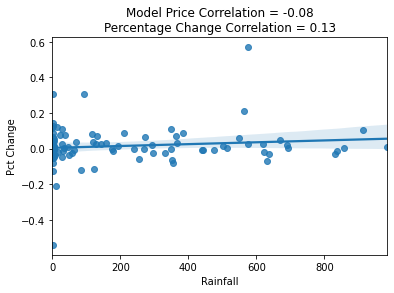

Maharashtra H
Modal Price correlation -0.18155035785531587
Pct Change correlation 0.041520351345721136


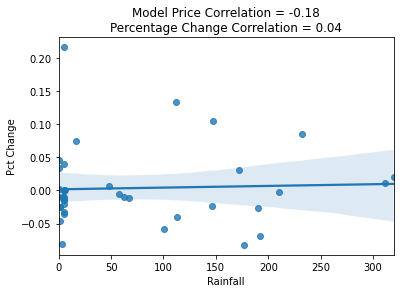

Maharashtra Other
Modal Price correlation -0.32445232316751804
Pct Change correlation 0.04634208311513613


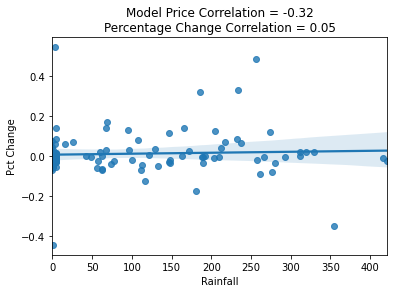

Punjab Other
Modal Price correlation 0.04017925178355262
Pct Change correlation -0.004740562409399045


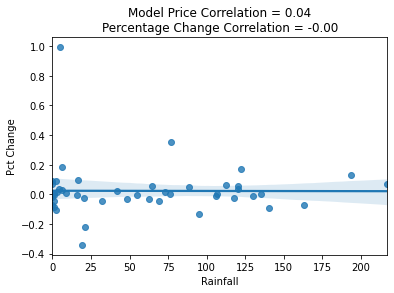

Rajasthan American
Modal Price correlation 0.018474395620275714
Pct Change correlation 0.13768900759856423


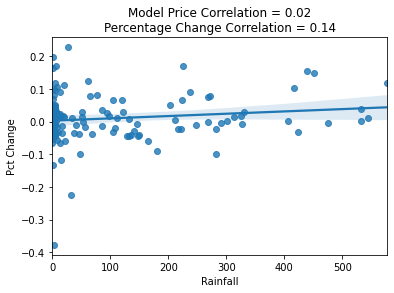

Rajasthan Desi
Modal Price correlation 0.15149891606242058
Pct Change correlation -0.01029461870891515


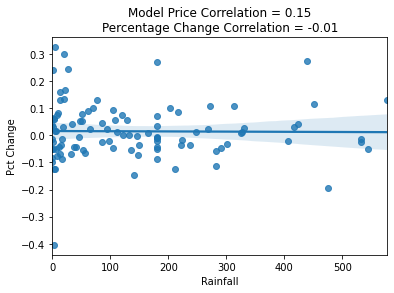

Rajasthan Other
Modal Price correlation -0.08730631027523937
Pct Change correlation 0.043405789681391464


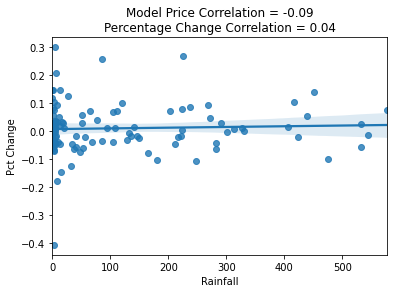

Tamil Nadu LRA
Modal Price correlation -0.0014085006961106327
Pct Change correlation 0.15502764878939684


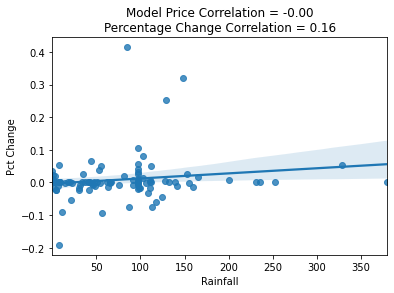

Tamil Nadu MCU
Modal Price correlation -0.16651222772585417
Pct Change correlation -0.10135284213029502


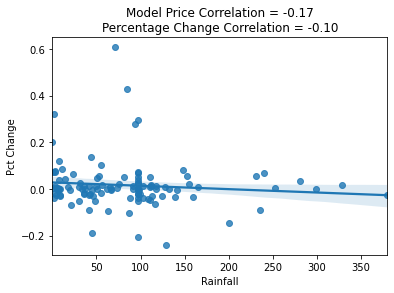

Tamil Nadu Other
Modal Price correlation 0.02649519953216764
Pct Change correlation 0.1886012760482679


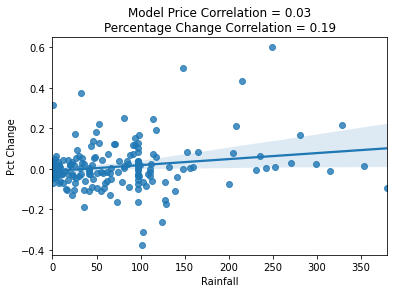

Telangana Cotton
Modal Price correlation 0.01792816646908655
Pct Change correlation 0.05813988280891842


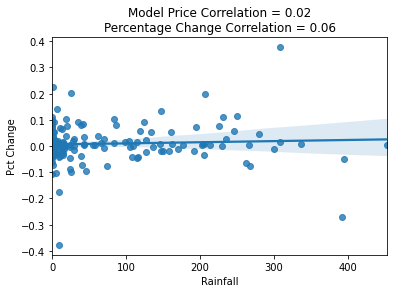

In [15]:
for state in pd.unique(df_prices['State']):
    df_state_rain=df_Rainfall.loc[df_Rainfall['State'] == state]
    df_state_prices=df_prices.loc[df_prices['State'] == state]
    for variety in pd.unique(df_state_prices['Variety']):
        print(state,variety)
        df_state_prices_variety=df_state_prices.loc[df_state_prices['Variety'] == variety]
        df_Rainfall_edited=df_state_rain.copy()
        df_Rainfall_edited['Date'] = pd.to_datetime(df_Rainfall_edited['Date'])             
        df_Rainfall_edited['Date'] = df_Rainfall_edited.Date + pd.DateOffset(months=5)  
        df_Rainfall_edited['Date'] = df_Rainfall_edited['Date'].dt.strftime('%Y-%m')
        merged_left = pd.merge(left=df_state_prices_variety, right=df_Rainfall_edited, how='left', left_on='Date', right_on='Date')
        merged_left=merged_left.interpolate(method='linear', limit_direction='forward', axis=0)
        merged_left['Pct_Change']=merged_left['Modal_Price'].pct_change()
        model_price_corr = merged_left['Modal_Price'].corr(merged_left['Value'])
        pct_change_corr = merged_left['Pct_Change'].corr(merged_left['Value'])
        print("Modal Price correlation",model_price_corr)
        print("Pct Change correlation",pct_change_corr)
        #sns.regplot(merged_left['Value'],merged_left['Modal_Price'])
        sns.regplot(merged_left['Value'],merged_left['Pct_Change'])
        plt.xlabel('Rainfall') 
        plt.ylabel('Pct Change')
        plt.title(f"Model Price Correlation = {model_price_corr:.2f}\nPercentage Change Correlation = {pct_change_corr:.2f}")
        plt.savefig(f'./Images/Rainfall/{state}_{variety}.png', bbox_inches = 'tight')
        plt.show()

In [16]:


def load_temperature_data():
    data = pd.read_csv('./Climate/Temperature/Monthly_National_1901_2017.csv')
    data = data.drop(['ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], axis = 1)
    data=data.rename(columns={"JAN": 1,"FEB": 2,"MAR": 3,"APR": 4,"MAY": 5,"JUN": 6,"JUL": 7,"AUG": 8,"SEP": 9,"OCT": 10,"NOV": 11,"DEC": 12,})
    data=data.melt(id_vars=["YEAR"], 
            var_name="Date", 
            value_name="Value")
    data['Date'] = data.YEAR.astype(str)+"-"+data.Date.astype(str)
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
    data['Date'] = data['Date'].dt.strftime('%Y-%m')
    data=data.drop(['YEAR'],axis=1)
    return data

df_Temperature = load_temperature_data()


Gujarat Cotton
Modal Price correlation 0.03135029792606871
Pct Change correlation -0.010842907548267132


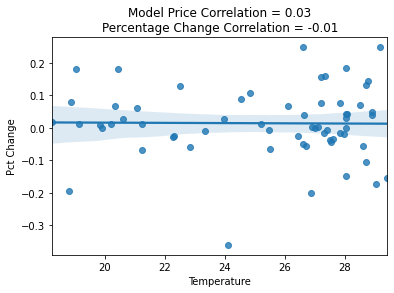

Gujarat H.B
Modal Price correlation -0.143659661016893
Pct Change correlation -0.044794217627220946


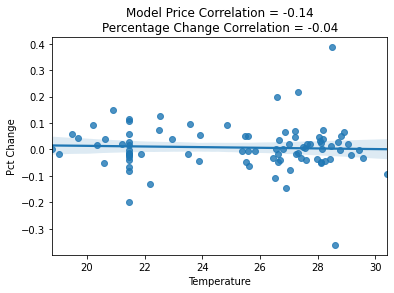

Gujarat Other
Modal Price correlation 0.013757758623004424
Pct Change correlation 0.03788585664343986


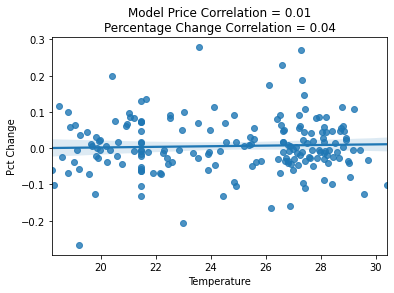

Gujarat Shanker
Modal Price correlation -0.06604164405844881
Pct Change correlation 0.1902116303870489


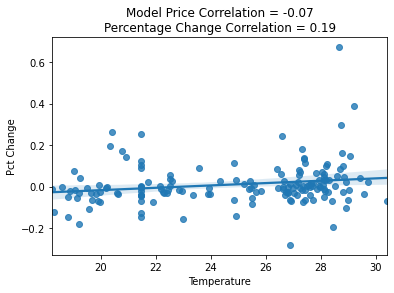

Haryana American
Modal Price correlation -0.3390045786031758
Pct Change correlation -0.06460127732933803


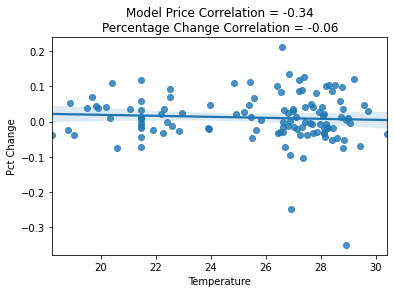

Karnataka F
Modal Price correlation -0.07085406952403986
Pct Change correlation -0.20129558786212298


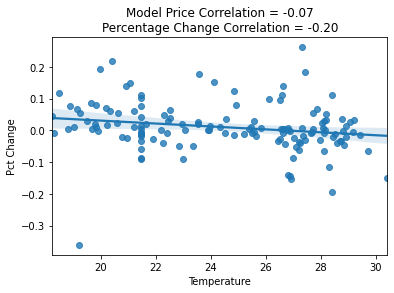

Karnataka GCH
Modal Price correlation -0.07417520374919347
Pct Change correlation 0.020502459670491448


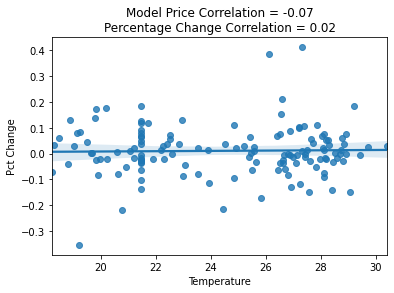

Karnataka LH
Modal Price correlation 0.027672120419151246
Pct Change correlation -0.13979692696385537


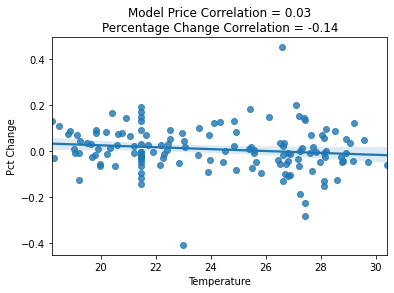

Karnataka MCU
Modal Price correlation 0.07576256393782235
Pct Change correlation 0.16149126785492177


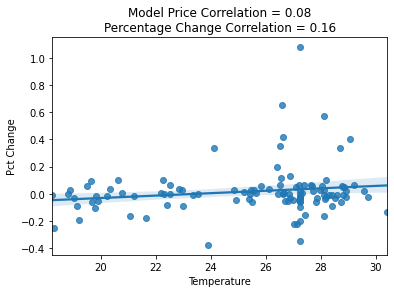

Madhya Pradesh DCH
Modal Price correlation 0.1584094860906443
Pct Change correlation 0.28406272759455103


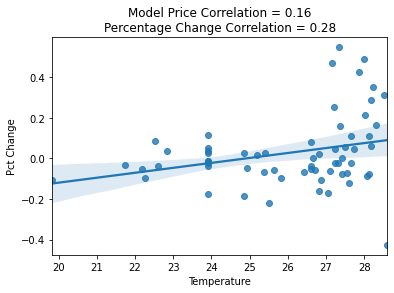

Madhya Pradesh H
Modal Price correlation -0.13072824881975986
Pct Change correlation 0.2028591578514642


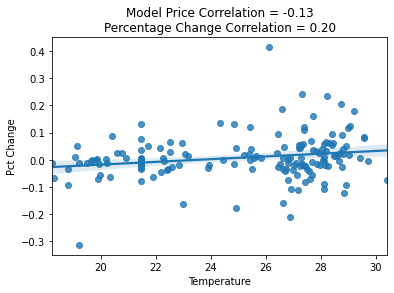

Madhya Pradesh Other
Modal Price correlation -0.18547882088187626
Pct Change correlation 0.28197858612921983


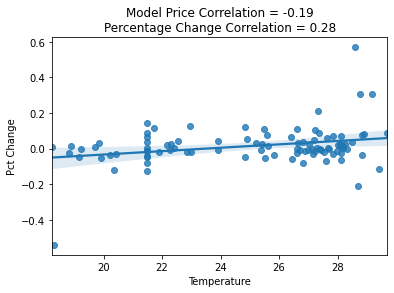

Maharashtra H
Modal Price correlation -0.18489211654537507
Pct Change correlation 0.01724912917488974


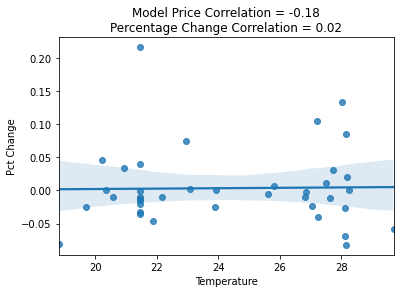

Maharashtra Other
Modal Price correlation -0.15598543226789982
Pct Change correlation 0.25405282629609494


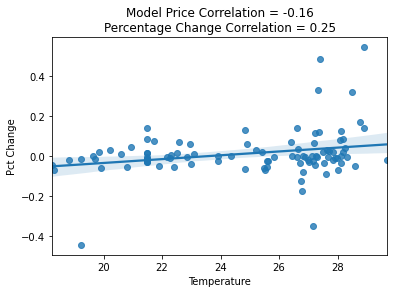

Punjab Other
Modal Price correlation 0.07034170586968307
Pct Change correlation -0.07362552223675174


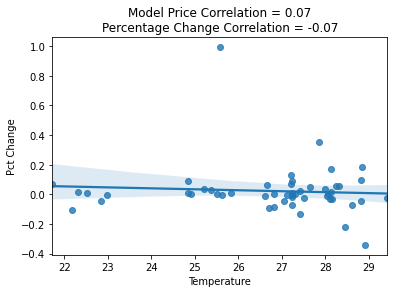

Rajasthan American
Modal Price correlation -0.22723790587753165
Pct Change correlation 0.057586098971928144


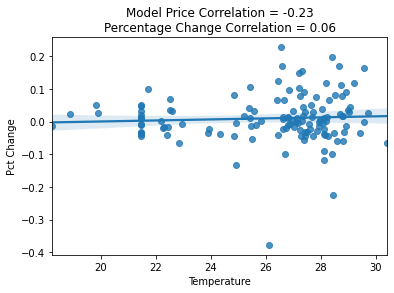

Rajasthan Desi
Modal Price correlation -0.022790217297386922
Pct Change correlation 0.11109899070186344


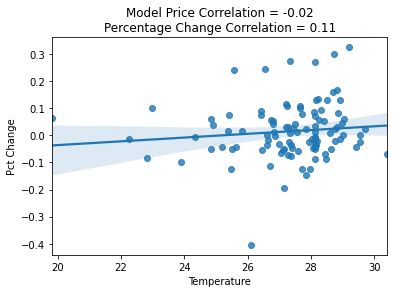

Rajasthan Other
Modal Price correlation -0.23810125728450643
Pct Change correlation 0.03162701317551931


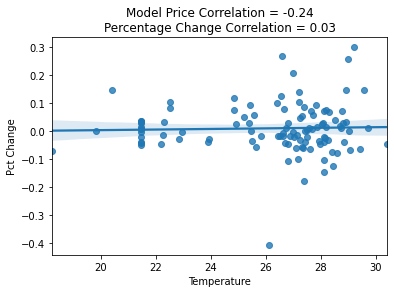

Tamil Nadu LRA
Modal Price correlation -0.2644140684873871
Pct Change correlation 0.03300250541717827


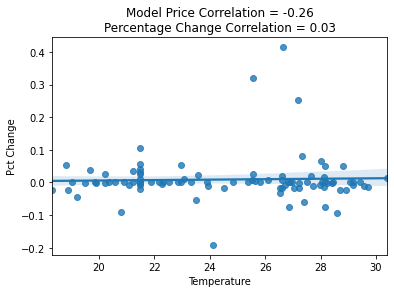

Tamil Nadu MCU
Modal Price correlation -0.2394799774033119
Pct Change correlation -0.05958539181401037


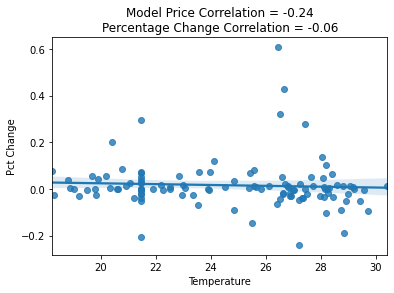

Tamil Nadu Other
Modal Price correlation -0.1184069543127892
Pct Change correlation -0.017877834296773528


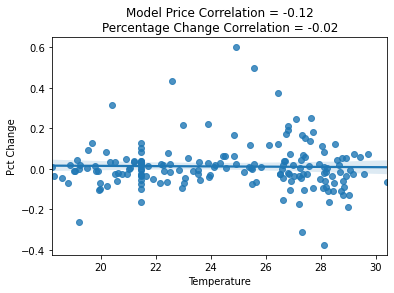

Telangana Cotton
Modal Price correlation 0.01779454899912048
Pct Change correlation 0.020411637236344482


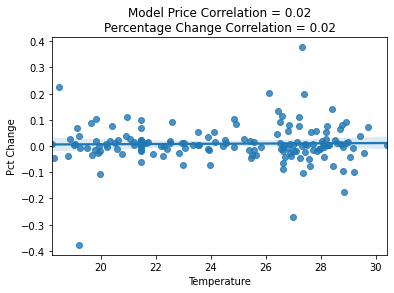

In [17]:


for state in pd.unique(df_prices['State']):
    df_state_temperature=df_Temperature.copy()
    df_state_prices=df_prices.loc[df_prices['State'] == state]
    for variety in pd.unique(df_state_prices['Variety']):
        print(state,variety)
        df_state_prices_variety=df_state_prices.loc[df_state_prices['Variety'] == variety]
        df_Temperature_edited=df_state_temperature.copy()
        df_Temperature_edited['Date'] = pd.to_datetime(df_Temperature_edited['Date'])             
        df_Temperature_edited['Date'] = df_Temperature_edited.Date + pd.DateOffset(months=5)  
        df_Temperature_edited['Date'] = df_Temperature_edited['Date'].dt.strftime('%Y-%m')
        merged_left = pd.merge(left=df_state_prices_variety, right=df_Temperature_edited, how='left', left_on='Date', right_on='Date')
        merged_left=merged_left.interpolate(method='linear', limit_direction='forward', axis=0)
        merged_left['Pct_Change']=merged_left['Modal_Price'].pct_change()
        merged_left=merged_left.fillna(0)
        model_price_corr = merged_left['Modal_Price'].corr(merged_left['Value'])
        pct_change_corr = merged_left['Pct_Change'].corr(merged_left['Value'])
        print("Modal Price correlation",model_price_corr)
        print("Pct Change correlation",pct_change_corr)
        #sns.regplot(merged_left['Value'],merged_left['Modal_Price'])
        sns.regplot(merged_left['Value'],merged_left['Pct_Change'])
        plt.xlabel('Temperature') 
        plt.ylabel('Pct Change') 
        plt.title(f"Model Price Correlation = {model_price_corr:.2f}\nPercentage Change Correlation = {pct_change_corr:.2f}")
        plt.savefig(f'./Images/Temperature/{state}_{variety}.png', bbox_inches = 'tight')
        plt.show()
        
        

In [18]:
def load_data_disaster():
    df_disaster = pd.read_csv('./disaster.csv')
    df_disaster.columns = df_disaster.columns.str.replace('_', ' ')
    for col in df_disaster.columns:
        if df_disaster[col][0]=='Value':
            df_disaster=df_disaster.drop([col], axis = 1)
    df_disaster=df_disaster.drop([0])
    df_disaster=df_disaster.melt(id_vars=["Year"], 
        var_name="State", 
        value_name="Area")
    df_disaster['Area']=df_disaster['Area'].astype(float)
    df_disaster['Area'][df_disaster['Area'] <= 0.09] = 0
    df_disaster['Area'][df_disaster['Area'] > 0.09] = 1
    return df_disaster

def load_price_data_disaster():
    df_prices_disaster=df_prices.copy()
    df_prices_disaster['Date'] = pd.to_datetime(df_prices_disaster['Date'], format='%Y-%m')
    df_prices_disaster['Date'] = df_prices_disaster['Date'].dt.strftime('%Y')
    df_prices_disaster=df_prices_disaster.groupby(['State','Variety','Date'], as_index=False).mean()
    return df_prices_disaster

In [19]:
df_disaster=load_data_disaster()
df_prices_disaster=load_price_data_disaster()

/home/sakshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/sakshat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [20]:
df_disaster

,Year,State,Area
0,1953,Tamil Nadu,0.0
1,1954,Tamil Nadu,0.0
2,1955,Tamil Nadu,0.0
3,1956,Tamil Nadu,0.0
4,1957,Tamil Nadu,0.0
...,...,...,...
2299,2012,Odisha,0.0
2300,2013,Odisha,0.0
2301,2014,Odisha,1.0
2302,2015,Odisha,0.0


Gujarat Cotton
Modal Price correlation -0.31124968714214624
Pct Change correlation -0.05390263294567393


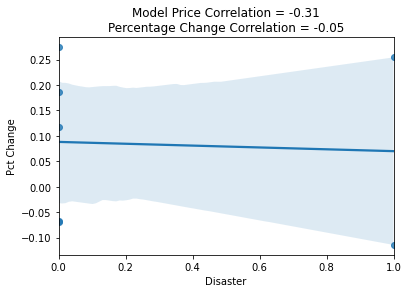

Gujarat H.B
Modal Price correlation -0.08317395958101072
Pct Change correlation 0.2355129072392735


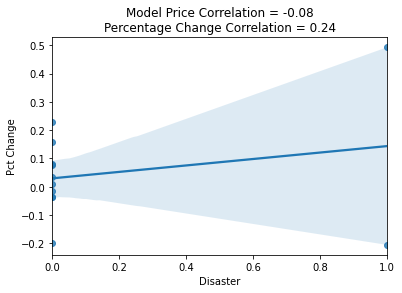

Gujarat Other
Modal Price correlation 0.050593117066070656
Pct Change correlation 0.16665507268465107


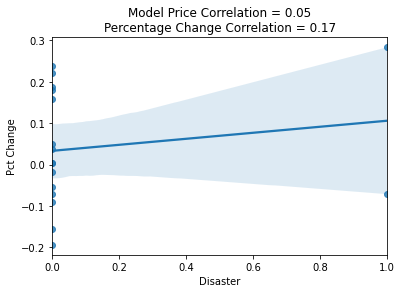

Gujarat Shanker
Modal Price correlation 0.056762740596249694
Pct Change correlation -0.041444928767490875


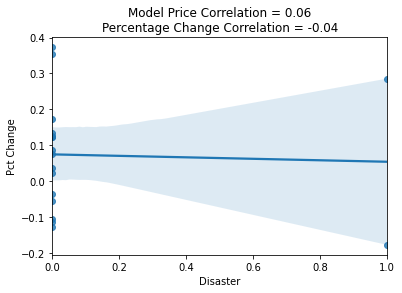

Haryana American
Modal Price correlation 0.0860565520358791
Pct Change correlation 0.09217716314054943


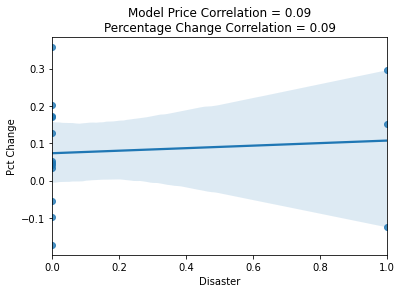

Karnataka F
Modal Price correlation 0.043124646675014124
Pct Change correlation -0.2764352019323546


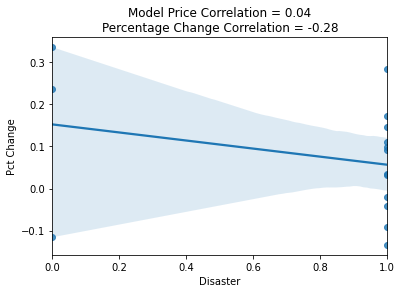

Karnataka GCH
Modal Price correlation 0.14600758818497295
Pct Change correlation -0.26590530670178464


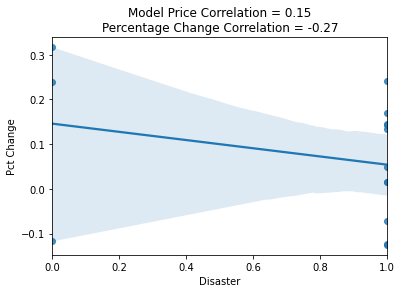

Karnataka LH
Modal Price correlation 0.23647945589008498
Pct Change correlation -0.15941107542732358


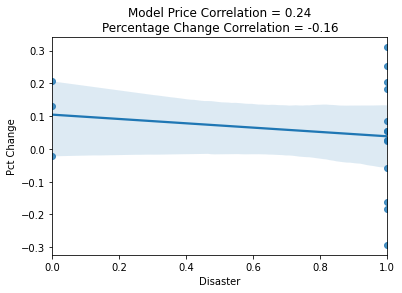

Karnataka MCU
Modal Price correlation 0.12397773153320726
Pct Change correlation -0.4767698933680952


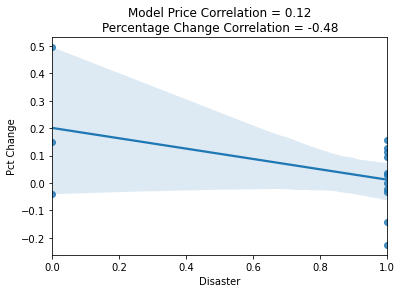

Madhya Pradesh DCH
Modal Price correlation 0.7305927552781855
Pct Change correlation -0.05993746812556526


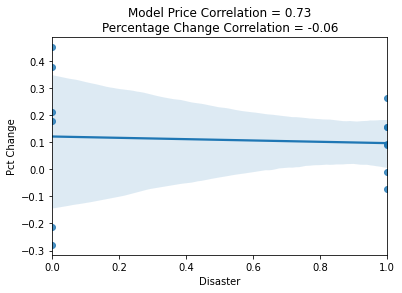

Madhya Pradesh H
Modal Price correlation 0.6800145218613113
Pct Change correlation 0.021836852103916678


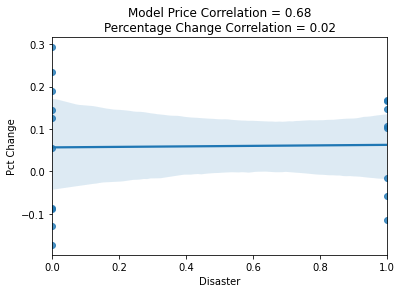

Madhya Pradesh Other
Modal Price correlation 0.7596689912794719
Pct Change correlation -0.12993595582144363


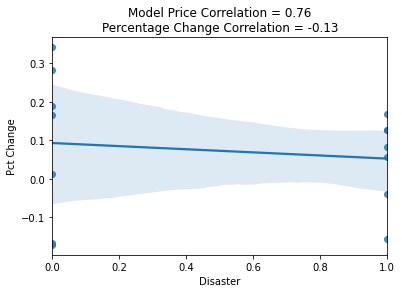

Maharashtra H
Modal Price correlation nan
Pct Change correlation nan


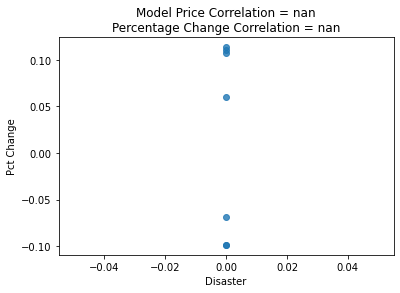

Maharashtra Other
Modal Price correlation nan
Pct Change correlation nan


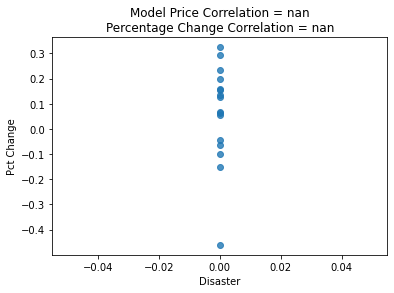

Punjab Other
Modal Price correlation 0.3561516156814273
Pct Change correlation 0.5636538069235483


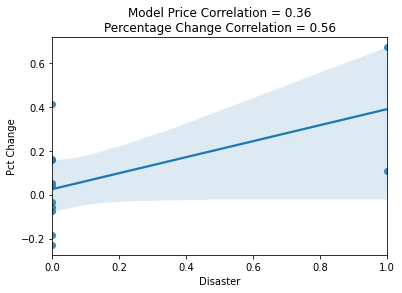

Rajasthan American
Modal Price correlation 0.4160166162747589
Pct Change correlation -0.4404432816997925


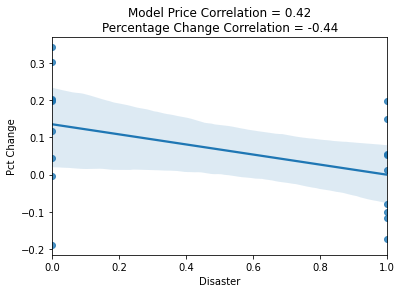

Rajasthan Desi
Modal Price correlation 0.39401944595451405
Pct Change correlation -0.31886778326485554


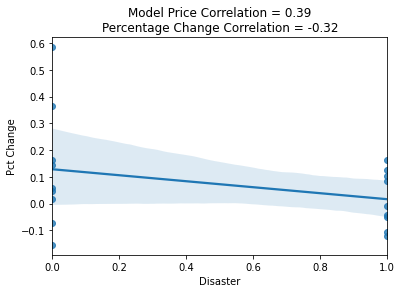

Rajasthan Other
Modal Price correlation 0.3598503346266267
Pct Change correlation -0.41707844555568485


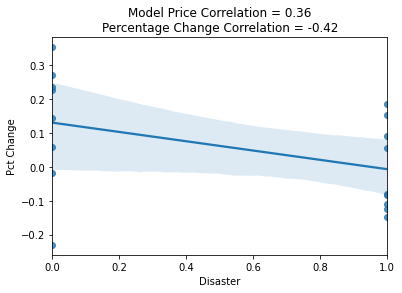

Tamil Nadu LRA
Modal Price correlation -0.11112461785881633
Pct Change correlation -0.3586892116477209


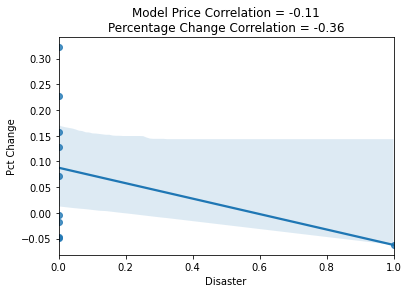

Tamil Nadu MCU
Modal Price correlation 0.09888073519692721
Pct Change correlation -0.28986480508983237


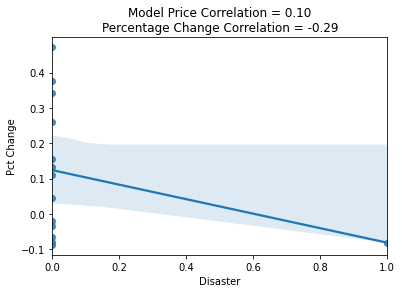

Tamil Nadu Other
Modal Price correlation -0.1853165173595086
Pct Change correlation -0.2651401242957032


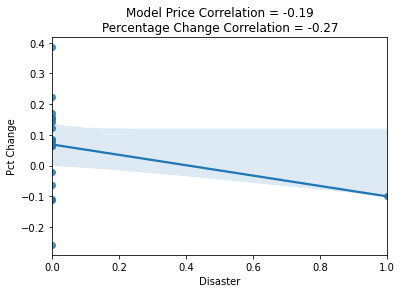

Telangana Cotton
Modal Price correlation nan
Pct Change correlation nan


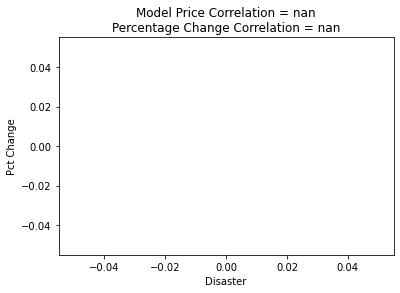

In [21]:
for state in pd.unique(df_prices_disaster['State']):
    df_state_disaster=df_disaster.loc[df_disaster['State'] == state]
    df_state_prices=df_prices_disaster.loc[df_prices_disaster['State'] == state]
    for variety in pd.unique(df_state_prices['Variety']):
        print(state,variety)
        df_state_prices_variety=df_state_prices.loc[df_state_prices['Variety'] == variety]
        merged_left = pd.merge(left=df_state_prices_variety, right=df_state_disaster, how='left', left_on='Date', right_on='Year')
        merged_left=merged_left.interpolate(method='linear', limit_direction='forward', axis=0)
        merged_left['Pct_Change']=merged_left['Modal_Price'].pct_change()
        model_price_corr = merged_left['Modal_Price'].corr(merged_left['Area'])
        pct_change_corr = merged_left['Pct_Change'].corr(merged_left['Area'])
        print("Modal Price correlation",model_price_corr)
        print("Pct Change correlation",pct_change_corr)
        #sns.regplot(merged_left['Area'],merged_left['Modal_Price'])
        sns.regplot(merged_left['Area'],merged_left['Pct_Change'])
        plt.xlabel('Disaster') 
        plt.ylabel('Pct Change')
        plt.title(f"Model Price Correlation = {model_price_corr:.2f}\nPercentage Change Correlation = {pct_change_corr:.2f}")
        plt.savefig(f'./Images/Disaster/{state}_{variety}.png', bbox_inches = 'tight')
        plt.show()

In [22]:
"""def get_correlation(market, variety):
    cat = market + '_x_' + variety
    forecasts = {'Daily': {}, 'Weekly': {}, 'Monthly': {}}
    Regr_forecast_cat_prices(cat)
    daily_forecasts = Regr_merge_forecasts(cat)
    forecasts['Daily'] = daily_forecasts
    TS_forecast_cat_prices(cat)
    weekly_monthly_forecasts = TS_merge_forecasts(cat)
    forecasts['Weekly'] = weekly_monthly_forecasts['Weekly']
    forecasts['Monthly'] = weekly_monthly_forecasts['Monthly']
    return forecasts

start = time.time()
print(get_forecasts('Adilabad', 'Cotton'))
print(time.time() - start)

start = time.time()
print(get_forecasts('Usilampatty', 'MCU'))
print(time.time() - start)"""

NameError: name 'time' is not defined